In [43]:
import kagglehub

# Download latest version
path= kagglehub.dataset_download("techsash/waste-classification-data")

print("path to dataset files:", path)

path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [44]:
#Importing necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [45]:
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

In [46]:
# importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [47]:
# visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 12565/12565 [00:06<00:00, 2050.93it/s]


In [48]:
data.shape

(22564, 2)

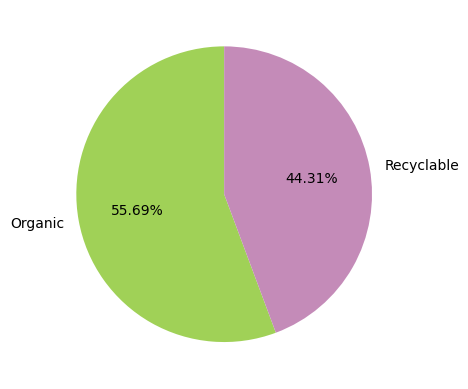

In [49]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic','Recyclable'], autopct='%0.2f%%', colors=colors,startangle = 90)
plt.show()

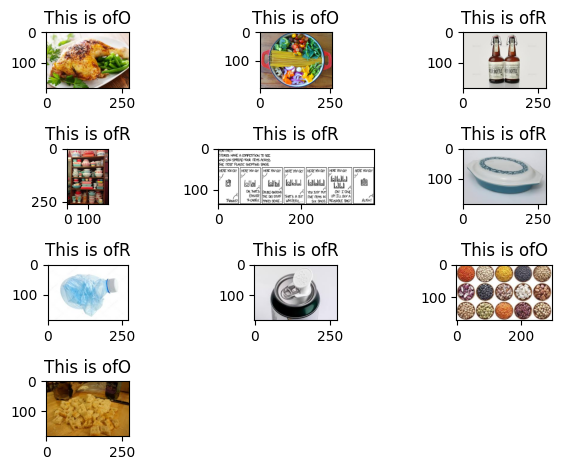

In [50]:
plt.Figure(figsize=(20,15))
for i in range(10):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This is of{0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [51]:
from pickletools import optimize

model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile (loss="binary_crossentropy",
               optimizer="adam",
               metrics=['accuracy'])
batch_size=32




In [52]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
train_datagen=ImageDataGenerator(rescale=1./255)

In [54]:

test_datagen=ImageDataGenerator(rescale=1./255)

In [55]:
train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")

test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [56]:
hist=model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
)

Epoch 1/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 50s 63ms/step - accuracy: 0.7542 - loss: 0.5538 - val_accuracy: 0.8623 - val_loss: 0.3335
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.8270 - loss: 0.4091 - val_accuracy: 0.8516 - val_loss: 0.3406
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.8539 - loss: 0.3662 - val_accuracy: 0.9045 - val_loss: 0.2612
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - accuracy: 0.8699 - loss: 0.3323 - val_accuracy: 0.8810 - val_loss: 0.3211
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - accuracy: 0.8876 - loss: 0.2862 - val_accuracy: 0.8798 - val_loss: 0.3722
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - accuracy: 0.9042 - loss: 0.2557 - val_accuracy: 0.8942 - val_loss: 0.3114
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.9245 - loss: 0.1971 - val_accuracy: 0.8997 - val_loss: 0.3182
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.9445 - loss: 0.1551 - 

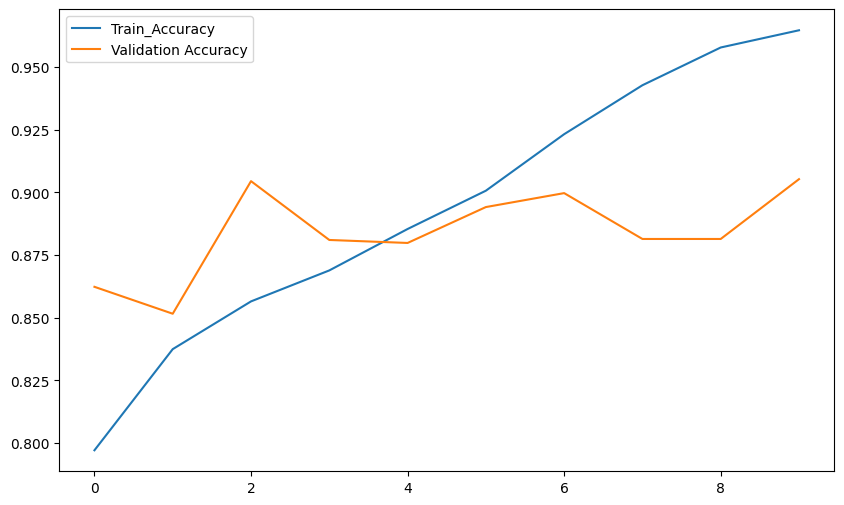

In [57]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'],label='Train_Accuracy')
plt.plot(hist.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

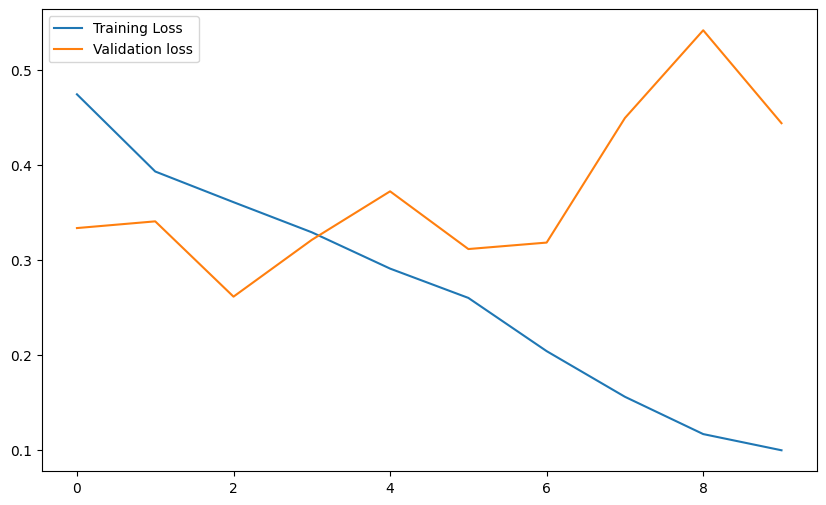

In [58]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'],label='Training Loss ')
plt.plot(hist.history['val_loss'],label='Validation loss')
plt.legend()
plt.show()

In [59]:
def predict_fun(img):
  plt.figure(figsize=(6,4))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.tight_layout()
  img=cv2.resize(img,(224,224))
  img=np.reshape(img,[-1,224,224,3])
  result = np.argmax(model.predict(img))
  if result==0:
    print('The image shown is Recyclable waste')
  elif result ==1:
    print('The image shown is organic waste')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
The image shown is organic waste


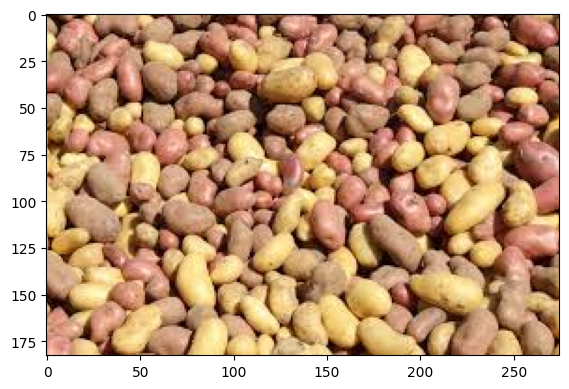

In [60]:
test_img=cv2.imread('/content/O_13134.jpg')
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The image shown is organic waste


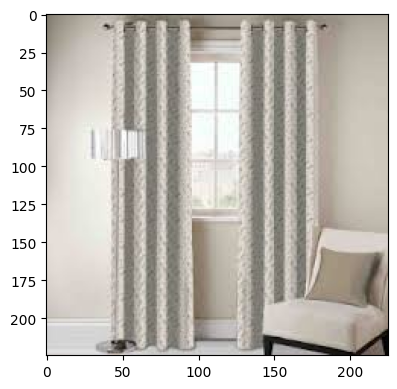

In [61]:
test_img=cv2.imread('/content/R_10107.jpg')
predict_fun(test_img)